Compare your finetuned model from task 3 to be compared against the results from task 2a for the cv-valid-dev mp3 dataset. Describe your observations and propose a series of steps (including datasets and experiments) to improve the accuracy. Your answer can be saved as training-report.pdf under the main repository.

Notebook is chosen instead to perform quantitative and qualitative analytics, similar to what was done for Task 3c.

Goal of Task: Fine-tuning vs Original Model Analysis - Has Fine-tuning helped?

In [8]:
!pip install jiwer


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\jared\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
from datasets import load_metric

In [12]:
wer_metric = load_metric("wer")

C:\Users\jared\AppData\Local\Temp\ipykernel_15732\24688115.py:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  wer_metric = load_metric("wer")


In [18]:
CSV_PATH_TASK_2A = r"C:\Users\jared\OneDrive\Documents\VSCode\job\htx\ds-test\asr\cv-valid-dev.csv"

In [19]:
all_train_results = pd.read_csv(CSV_PATH_TASK_2A)
all_train_results

,filename,text,up_votes,down_votes,age,gender,accent,duration,file_id,generated_text
0,cv-valid-dev/sample-000000.mp3,be careful with your prognostications said the...,1,0,NaN,NaN,NaN,NaN,0,BE CAREFUL WITH YOU PROPMASTIGATIONS SAID THE ...
1,cv-valid-dev/sample-000001.mp3,then why should they be surprised when they se...,2,0,NaN,NaN,NaN,NaN,1,THEN WHY SHOULD THEY BE SURPRISED WHEN THISSI ...
2,cv-valid-dev/sample-000002.mp3,a young arab also loaded down with baggage ent...,2,0,NaN,NaN,NaN,NaN,2,A YOUNG ARAB ALSO LOADED DOWN WITH BAGGAGE ENT...
3,cv-valid-dev/sample-000003.mp3,i thought that everything i owned would be des...,3,0,NaN,NaN,NaN,NaN,3,I FELT THAT EVERYTHING I OWNED WOULD BE DESTROYED
4,cv-valid-dev/sample-000004.mp3,he moved about invisible but everyone could he...,1,0,fourties,female,england,NaN,4,HE MOVED ABOUT INVISIBLE BUT EVERY ONE COULD H...
...,...,...,...,...,...,...,...,...,...,...
4071,cv-valid-dev/sample-004071.mp3,but they could never have taught him arabic,2,1,NaN,NaN,NaN,NaN,4071,BUT THEY COULD NEVER HAVE TAUGHT HIM ARABIC
4072,cv-valid-dev/sample-004072.mp3,he decided to concentrate on more practical ma...,1,0,NaN,NaN,NaN,NaN,4072,HE DECIDED TO CONCENTRATE ON MORE PRACTICAL MA...
4073,cv-valid-dev/sample-004073.mp3,that's what i'm not supposed to say,2,0,thirties,male,us,NaN,4073,THAT'S WHAT I'M NOT SUPPOSED TO SAY
4074,cv-valid-dev/sample-004074.mp3,just handling them made him feel better,3,0,NaN,NaN,NaN,NaN,4074,JEST ANDELIN GO BEAT HIM FEEL PICGER


In [20]:
selected_columns = ['filename', 'text', 'generated_text']

train_results_df = all_train_results[selected_columns]
train_results_df

,filename,text,generated_text
0,cv-valid-dev/sample-000000.mp3,be careful with your prognostications said the...,BE CAREFUL WITH YOU PROPMASTIGATIONS SAID THE ...
1,cv-valid-dev/sample-000001.mp3,then why should they be surprised when they se...,THEN WHY SHOULD THEY BE SURPRISED WHEN THISSI ...
2,cv-valid-dev/sample-000002.mp3,a young arab also loaded down with baggage ent...,A YOUNG ARAB ALSO LOADED DOWN WITH BAGGAGE ENT...
3,cv-valid-dev/sample-000003.mp3,i thought that everything i owned would be des...,I FELT THAT EVERYTHING I OWNED WOULD BE DESTROYED
4,cv-valid-dev/sample-000004.mp3,he moved about invisible but everyone could he...,HE MOVED ABOUT INVISIBLE BUT EVERY ONE COULD H...
...,...,...,...
4071,cv-valid-dev/sample-004071.mp3,but they could never have taught him arabic,BUT THEY COULD NEVER HAVE TAUGHT HIM ARABIC
4072,cv-valid-dev/sample-004072.mp3,he decided to concentrate on more practical ma...,HE DECIDED TO CONCENTRATE ON MORE PRACTICAL MA...
4073,cv-valid-dev/sample-004073.mp3,that's what i'm not supposed to say,THAT'S WHAT I'M NOT SUPPOSED TO SAY
4074,cv-valid-dev/sample-004074.mp3,just handling them made him feel better,JEST ANDELIN GO BEAT HIM FEEL PICGER


In [21]:
# converting to lower case
train_results_df['pred_str'] = train_results_df['generated_text'].str.lower()
train_results_df

C:\Users\jared\AppData\Local\Temp\ipykernel_15732\2417780285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_results_df['pred_str'] = train_results_df['generated_text'].str.lower()


,filename,text,generated_text,pred_str
0,cv-valid-dev/sample-000000.mp3,be careful with your prognostications said the...,BE CAREFUL WITH YOU PROPMASTIGATIONS SAID THE ...,be careful with you propmastigations said the ...
1,cv-valid-dev/sample-000001.mp3,then why should they be surprised when they se...,THEN WHY SHOULD THEY BE SURPRISED WHEN THISSI ...,then why should they be surprised when thissi ...
2,cv-valid-dev/sample-000002.mp3,a young arab also loaded down with baggage ent...,A YOUNG ARAB ALSO LOADED DOWN WITH BAGGAGE ENT...,a young arab also loaded down with baggage ent...
3,cv-valid-dev/sample-000003.mp3,i thought that everything i owned would be des...,I FELT THAT EVERYTHING I OWNED WOULD BE DESTROYED,i felt that everything i owned would be destroyed
4,cv-valid-dev/sample-000004.mp3,he moved about invisible but everyone could he...,HE MOVED ABOUT INVISIBLE BUT EVERY ONE COULD H...,he moved about invisible but every one could h...
...,...,...,...,...
4071,cv-valid-dev/sample-004071.mp3,but they could never have taught him arabic,BUT THEY COULD NEVER HAVE TAUGHT HIM ARABIC,but they could never have taught him arabic
4072,cv-valid-dev/sample-004072.mp3,he decided to concentrate on more practical ma...,HE DECIDED TO CONCENTRATE ON MORE PRACTICAL MA...,he decided to concentrate on more practical ma...
4073,cv-valid-dev/sample-004073.mp3,that's what i'm not supposed to say,THAT'S WHAT I'M NOT SUPPOSED TO SAY,that's what i'm not supposed to say
4074,cv-valid-dev/sample-004074.mp3,just handling them made him feel better,JEST ANDELIN GO BEAT HIM FEEL PICGER,jest andelin go beat him feel picger


In [22]:
# Calculate WER for each row
train_results_df['wer'] = train_results_df.apply(lambda row: wer_metric.compute(predictions=[row['pred_str']], 
                                                                    references=[row['text']]), 
                                                                    axis=1) 

train_results_df

C:\Users\jared\AppData\Local\Temp\ipykernel_15732\1338069557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_results_df['wer'] = train_results_df.apply(lambda row: wer_metric.compute(predictions=[row['pred_str']],


,filename,text,generated_text,pred_str,wer
0,cv-valid-dev/sample-000000.mp3,be careful with your prognostications said the...,BE CAREFUL WITH YOU PROPMASTIGATIONS SAID THE ...,be careful with you propmastigations said the ...,0.250000
1,cv-valid-dev/sample-000001.mp3,then why should they be surprised when they se...,THEN WHY SHOULD THEY BE SURPRISED WHEN THISSI ...,then why should they be surprised when thissi ...,0.300000
2,cv-valid-dev/sample-000002.mp3,a young arab also loaded down with baggage ent...,A YOUNG ARAB ALSO LOADED DOWN WITH BAGGAGE ENT...,a young arab also loaded down with baggage ent...,0.000000
3,cv-valid-dev/sample-000003.mp3,i thought that everything i owned would be des...,I FELT THAT EVERYTHING I OWNED WOULD BE DESTROYED,i felt that everything i owned would be destroyed,0.111111
4,cv-valid-dev/sample-000004.mp3,he moved about invisible but everyone could he...,HE MOVED ABOUT INVISIBLE BUT EVERY ONE COULD H...,he moved about invisible but every one could h...,0.222222
...,...,...,...,...,...
4071,cv-valid-dev/sample-004071.mp3,but they could never have taught him arabic,BUT THEY COULD NEVER HAVE TAUGHT HIM ARABIC,but they could never have taught him arabic,0.000000
4072,cv-valid-dev/sample-004072.mp3,he decided to concentrate on more practical ma...,HE DECIDED TO CONCENTRATE ON MORE PRACTICAL MA...,he decided to concentrate on more practical ma...,0.000000
4073,cv-valid-dev/sample-004073.mp3,that's what i'm not supposed to say,THAT'S WHAT I'M NOT SUPPOSED TO SAY,that's what i'm not supposed to say,0.000000
4074,cv-valid-dev/sample-004074.mp3,just handling them made him feel better,JEST ANDELIN GO BEAT HIM FEEL PICGER,jest andelin go beat him feel picger,0.714286


Similar to Task 3c, 2 forms of analysis are used, qualitiative and quantitative:
1. Quantitative - using WER metric on results
2. Qualitiative - manual inspection of outputs

## 1. Quantiative

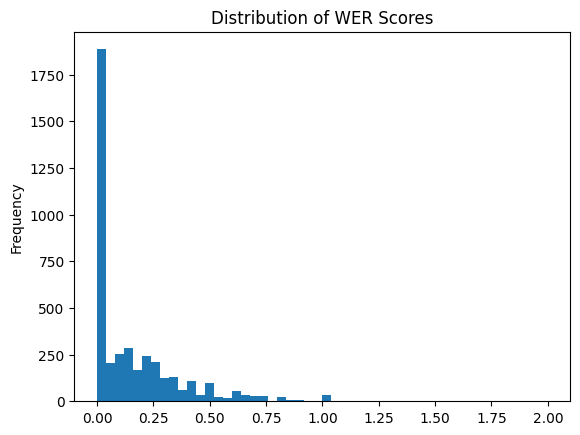

In [23]:
import matplotlib.pyplot as plt

# Plot the distribution of WER scores
train_results_df['wer'].plot.hist(bins=50, title="Distribution of WER Scores", xlabel="WER", ylabel="Frequency") 

# Show the plot
plt.show() 

In [24]:
# Get descriptive statistics for the 'wer' column
wer_stats = train_results_df['wer'].describe()
wer_stats

count    4076.000000
mean        0.154374
std         0.217326
min         0.000000
25%         0.000000
50%         0.072751
75%         0.250000
max         2.000000
Name: wer, dtype: float64

Observations:
- (Bar Chart) Distribution is fairly skewed to the left, with significant records also being at the lowest bin towards 0, showing a big proportion of transcriptions were highly accurate
- WER statistics support these finding of a distribution very skewed to the left, with the mean being 0.15, 50-percentile 0.07, and 75-percentile 0.25

Comparison with Fine-tune:
Bar Chart distributions fairly similar, not much difference observed. Whereas, statistics show more differences showing enhances results post-finetuning:
- Post fine-tuning revealing a decrease in overall mean (0.13<0.15);
- Slightly lower spread as seen by a slight decrease in standard distribution (0.20<0.21);
- A slight drop in both 50-percentile (0.06<0.07) and larger drop in 75-percentile (0.20<0.25)

## 2. Qualitative

Given large dataset output, Qualitative analysis is done via random sampling.

In [26]:
import random

# Get the number of rows in the DataFrame
num_rows = len(train_results_df)

# Define the number of rows to select
num_samples = 10  

# Create a list of random indices
random_indices = random.sample(range(num_rows), num_samples)

# Select the random rows from the DataFrame
random_rows_df = train_results_df.iloc[random_indices]

# Print the selected rows
random_rows_df

,filename,text,generated_text,pred_str,wer
3962,cv-valid-dev/sample-003962.mp3,the boy reminded the old man that he had said ...,THE BOY REMINDED THE OLD MAN THAT HE HAD SAID ...,the boy reminded the old man that he had said ...,0.000000
3320,cv-valid-dev/sample-003320.mp3,the englishman asked if they were in danger,THE ENGLISHMEN ASKED IF THERE WERE IN DANGER,the englishmen asked if there were in danger,0.250000
2106,cv-valid-dev/sample-002106.mp3,it was no more exciting than an overturned car...,IT WAS NO MORE EXCITING THAN AN OVERTURNED CAR...,it was no more exciting than an overturned car...,0.062500
1061,cv-valid-dev/sample-001061.mp3,maybe this is an omen said the englishman half...,MAYBE THIS IS AN OMEN SAID THE ENGLISHMAN HALF...,maybe this is an omen said the englishman half...,0.000000
3256,cv-valid-dev/sample-003256.mp3,another run on the bank,ANOTHER RUN ON THE BANK,another run on the bank,0.000000
2291,cv-valid-dev/sample-002291.mp3,you haven't got your wings yet,YOU HAVEN'T GOT YOUR WINGS YET,you haven't got your wings yet,0.000000
1333,cv-valid-dev/sample-001333.mp3,hitting the delete and escape keys did nothing,HE TAME THE DIRIT AND ESCAPE GUISE LE ATIC,he tame the dirit and escape guise le atic,0.750000
3739,cv-valid-dev/sample-003739.mp3,did you see the garden that it took the master...,DID YOU SEE THE GARDEN THAT IT TOOK THE MASTER...,did you see the garden that it took the master...,0.000000
1807,cv-valid-dev/sample-001807.mp3,then she took both of his hands in hers and be...,THEN SHE TOOK BOTH OF HIS HANDS IN HARRORS AND...,then she took both of his hands in harrors and...,0.071429
221,cv-valid-dev/sample-000221.mp3,the night was warm and i was thirsty,THE NIGHT WAS WARM AND I WAS THIRSTY,the night was warm and i was thirsty,0.000000


Observations:
- Handful of records with WER of 0, showing perfect matching
- A few errors which are more significant; while Fine-tuning showed smaller differences (eg 'ELVIS' vs 'ALVIS'), results from the original model show greater degree of differences (eg. 'hitting the delete and escape keys did nothing' vs 'he tame the dirit and escape guise le atic')

Overall, it can be said fine-tuning has enhanced the transcription accuracy overall.

Potential Improvements:
- Data augmentation techniques
- Hyperparameter tuning
- Using larger datasets
- Transfer learning (Omitted from steps to improve accuracy since we technically have done Transfer Learning in this assignment by calling the pre-trained model from Facebook, plus also it is already a significantly large and powerful model)

Steps to improve the accuracy (including datasets and experiments):
1. Using Larger Datasets: 
- To improve model performance, consider utilizing larger datasets. This can be achieved by incorporating publicly available datasets like LibriSpeech, VoxForge, and Common Voice (including other languages), or by combining the existing dataset with other relevant sources to increase both size and diversity of training data.
2. Data Augmentation techniques: 
- Data augmentation techniques such as speed perturbation (slightly increasing or decreasing playback speed) and volume variations (randomly adjusting audio volume) help the model generalize better to different speaking styles and recording conditions. 
- Furthermore, adding background noise (e.g., white noise, babble noise) to the audio during training simulates noisy environments, enhancing the model's ability to accurately transcribe speech in challenging acoustic conditions.
3. Hyperparameter Tuning:
- Techniques like grid search, random search can be employed to systematically explore different learning rate values and identify the setting that yields the best results on a validation set.